# Desafios - Aula 01

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/pedrogrigorio/Imersao-Dados-Alura/main/Materiais/dados_imoveis.csv"
dados = pd.read_csv(url)
dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


## Desafio 01

### Realizar a média da metragem para cada um dos bairros

Percebi duas formas de se fazer. Nesse sentido, uma delas é agrupar as tuplas por bairro e logo na frente do comando pegar a coluna da metragem e calcular a média.

In [68]:
metragem_por_bairro = dados.groupby('Bairro')['Metragem'].mean().round(2)
metragem_por_bairro

Bairro
Aclimação            253.06
Alto da Boa Vista    418.88
Alto da Lapa         294.34
Alto da Mooca        270.05
Alto de Pinheiros    433.44
                      ...  
Vila Água Funda      152.20
Água Branca          191.00
Água Fria            165.42
Água Funda           139.00
Água Rasa            340.25
Name: Metragem, Length: 701, dtype: float64

A outra forma, é agrupar por bairro e utilizar uma função agregada que, neste caso, é a média, onde passamos o nome da coluna da média e a operação. Obs: a função round em ambos os casos serve apenas para colocar a precisão de 2 casas decimais.

In [9]:
dados.groupby("Bairro").agg({'Metragem': ['mean']}).round(2)

,Metragem
,mean
Bairro,
Aclimação,253.06
Alto da Boa Vista,418.88
Alto da Lapa,294.34
Alto da Mooca,270.05
Alto de Pinheiros,433.44
...,...
Vila Água Funda,152.20
Água Branca,191.00


## Desafio 02

### Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) 

Uma das formas é a que foi vista em aula, na qual verificamos se existem imóveis no bairro desejado e depois geramos um dataframe com os imóveis existentes.

In [21]:
tem_imoveis_jardim = dados["Bairro"] == 'Jardim Europa'
tem_imoveis_jardim

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [27]:
imoveis_jardim_europa = dados[tem_imoveis_jardim]
imoveis_jardim_europa

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
60,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,R$ 13.000
102,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,R$ 37.000.000
140,Rua Rússia,Jardim Europa,São Paulo,200,3,3,2,R$ 2.700.000
150,NaN,Jardim Europa,São Paulo,693,4,5,6,R$ 16.000.000
195,Rua Itália,Jardim Europa,São Paulo,713,5,7,6,R$ 26.600.000
...,...,...,...,...,...,...,...,...
9593,"Rua Holanda, 192",Jardim Europa,São Paulo,720,5,10,8,R$ 13.499.900
9604,NaN,Jardim Europa,São Paulo,800,4,7,6,R$ 11.980.000
9657,NaN,Jardim Europa,São Paulo,750,4,7,6,R$ 30.000\n /Mês
9760,NaN,Jardim Europa,São Paulo,580,3,5,3,R$ 5.200.000


A outra forma é utilizar o método `pandas.Dataframe.eq()` onde passamos a coluna em Dataframe e são retornadas as tuplas por igualdade dessa coluna com o atributo passado.

In [26]:
dados[dados["Bairro"].eq('Jardim Europa')]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
60,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,R$ 13.000
102,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,R$ 37.000.000
140,Rua Rússia,Jardim Europa,São Paulo,200,3,3,2,R$ 2.700.000
150,NaN,Jardim Europa,São Paulo,693,4,5,6,R$ 16.000.000
195,Rua Itália,Jardim Europa,São Paulo,713,5,7,6,R$ 26.600.000
...,...,...,...,...,...,...,...,...
9593,"Rua Holanda, 192",Jardim Europa,São Paulo,720,5,10,8,R$ 13.499.900
9604,NaN,Jardim Europa,São Paulo,800,4,7,6,R$ 11.980.000
9657,NaN,Jardim Europa,São Paulo,750,4,7,6,R$ 30.000\n /Mês
9760,NaN,Jardim Europa,São Paulo,580,3,5,3,R$ 5.200.000


Uma terceira forma seria utilizar o método `pandas.Dataframe.query()` onde utilizamos um condicional como parâmetro, colocando apenas o nome do nosso dataframe antes de query. <br><br>
_Obs: neste método, o parâmetro deve ser passado entre aspas e, além disso, nosso atributo Bairro é do tipo string, então o nome do bairro também deve ser colocado entre aspas. Logo, deve-se utilizar aspas simples no nome do atributo e aspas duplas entre todo o parâmetro._

In [31]:
dados.query("Bairro == 'Jardim Europa'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
60,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,R$ 13.000
102,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,R$ 37.000.000
140,Rua Rússia,Jardim Europa,São Paulo,200,3,3,2,R$ 2.700.000
150,NaN,Jardim Europa,São Paulo,693,4,5,6,R$ 16.000.000
195,Rua Itália,Jardim Europa,São Paulo,713,5,7,6,R$ 26.600.000
...,...,...,...,...,...,...,...,...
9593,"Rua Holanda, 192",Jardim Europa,São Paulo,720,5,10,8,R$ 13.499.900
9604,NaN,Jardim Europa,São Paulo,800,4,7,6,R$ 11.980.000
9657,NaN,Jardim Europa,São Paulo,750,4,7,6,R$ 30.000\n /Mês
9760,NaN,Jardim Europa,São Paulo,580,3,5,3,R$ 5.200.000


## Desafio 03

### Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão

Plotar alguns gráficos do dataframe tirado do primeiro desafio, onde temos a média da metragem dos imóveis por bairro.

In [69]:
metragem_por_bairro.head()

Bairro
Aclimação            253.06
Alto da Boa Vista    418.88
Alto da Lapa         294.34
Alto da Mooca        270.05
Alto de Pinheiros    433.44
Name: Metragem, dtype: float64

<AxesSubplot:xlabel='Bairro'>

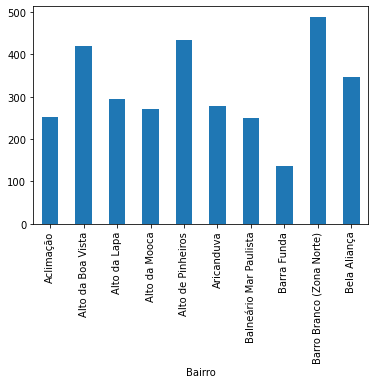

In [70]:
metragem_por_bairro.head(10).plot.bar()

<AxesSubplot:ylabel='Bairro'>

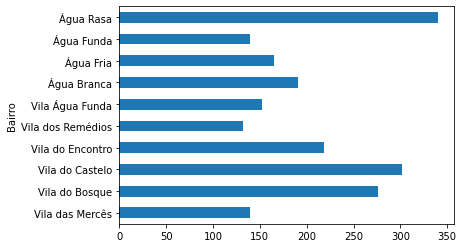

In [75]:
metragem_por_bairro.tail(10).plot.barh()

<AxesSubplot:ylabel='Metragem'>

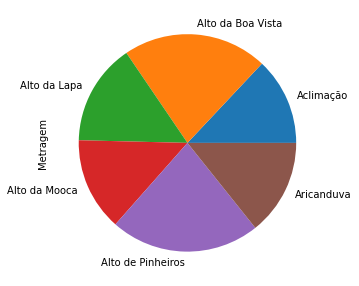

In [74]:
metragem_por_bairro.head(6).plot.pie(y='Metragem', figsize=(5,5))

Plotar gráficos que forneçam informações sobre a média de banheiros, quartos e vagas dos apartamentos por bairros.

In [88]:
info_por_bairro = dados.groupby("Bairro")["Quartos", "Banheiros", "Vagas"].mean().round(0)
info_por_bairro

C:\Users\pedro\AppData\Local\Temp\ipykernel_11804\550109034.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  info_por_bairro = dados.groupby("Bairro")["Quartos", "Banheiros", "Vagas"].mean().round(0)


,Quartos,Banheiros,Vagas
Bairro,,,
Aclimação,3.0,3.0,3.0
Alto da Boa Vista,4.0,5.0,5.0
Alto da Lapa,3.0,4.0,4.0
Alto da Mooca,3.0,3.0,4.0
Alto de Pinheiros,4.0,5.0,5.0
...,...,...,...
Vila Água Funda,3.0,2.0,3.0
Água Branca,3.0,3.0,2.0
Água Fria,3.0,3.0,2.0


<AxesSubplot:xlabel='Bairro'>

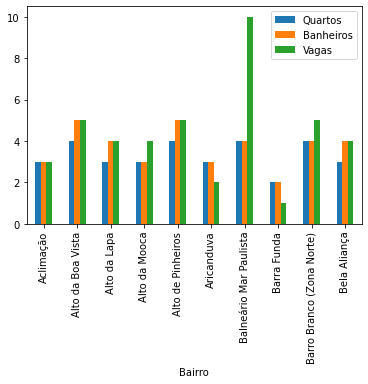

In [89]:
info_por_bairro.head(10).plot.bar()

<AxesSubplot:ylabel='Bairro'>

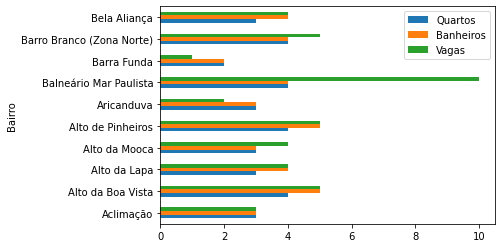

In [98]:
info_por_bairro.head(10).plot.barh()

<AxesSubplot:ylabel='Density'>

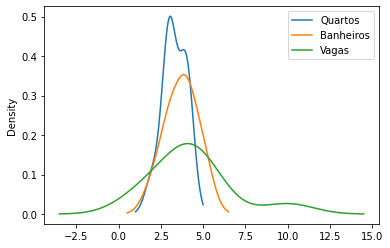

In [90]:
info_por_bairro.head(10).plot.kde()

## Desafio 04

### Pegar outros estatísticas dos dados, média, mediana, mim, max

## Desafio 05

### Descobrir quais são os bairros que não tem nome de rua

In [100]:
sem_rua = pd.isna(dados["Rua"])
sem_rua

0        False
1        False
2        False
3         True
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Rua, Length: 10008, dtype: bool

In [109]:
bairros_sem_rua = dados[sem_rua].groupby("Bairro").first()
bairros_sem_rua

,Rua,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
Bairro,,,,,,,
Aclimação,None,São Paulo,180,3,3,4,R$ 2.200.000
Alto da Boa Vista,None,São Paulo,595,4,5,4,R$ 3.000.000
Alto da Lapa,None,São Paulo,170,4,5,6,R$ 1.700.000
Alto da Mooca,None,São Paulo,114,2,2,2,R$ 530.000
Alto de Pinheiros,None,São Paulo,358,4,4,4,R$ 3.500.000
...,...,...,...,...,...,...,...
Vila do Encontro,None,São Paulo,180,4,2,3,R$ 724.000
Água Branca,None,São Paulo,400,4,1,5,R$ 6.500\n /Mês
Água Fria,None,São Paulo,190,3,4,4,R$ 750.000
